# Analyzing the Annual Disclosure Data on the H-1B Program

### Data Bootcamp Final Project, Spring 2017
### Jinho Huh & Yifan Ma

![H1B](http://www.nearshoreamericas.com/wp-content/uploads/2017/04/h1b-visa.jpg)

### Introduction

The H-1B program applies to employers seeking to hire nonimmigrant aliens as workers in specialty occupations. The number of H-1B visa applications filed has increased significantly for the past five years. International students who want to work in the United States after graduation may wonder what positions are associated with most H-1B visas and what states have most employees who are on H-1B visas. Therefore, we would like to look into the latest annual disclosure data and address a few meaningful questions that will hopefully provide some insights regarding career choices for international students.

### Data Sources

The annual disclosure data for different programs are easily accessible from the official website of United States Department of Labor, Employment & Training Administration, Office of Foreign Labor Certification.

We are going to analyze the annual disclosure data on LCA programs (H-1B, H-1B1, E-3) for the fiscal year of 2016.
Anyone interested in other related datasets can go to [OFLC Performance Data](https://www.foreignlaborcert.doleta.gov/performancedata.cfm).

2014 Regional Price Parities by State published in July, 2016 are retrieved through U.S. Department of Commerce, Bureau of Economic Analysis' interactive data application and will be used when addressing questions related to cost of living. To download the exact same data set, please visit [BEA Interactive Data: Regional](https://www.bea.gov/iTable/index_regional.cfm) and follow the steps outlined below:

Click on 'Begin using the data'->'Real Personal Income and Regional Price Parities'->'Regional Price Parities (RPP1)', Choose 'States'->'All areas'&'RPPs: All items'->'2014'

We download the table in Excel format.

In [1]:
import sys
import pandas as pd                   
import matplotlib.pyplot as plt      
import datetime as dt                  
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import ssl

%matplotlib inline
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version:  3.6.0 |Anaconda custom (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version:  0.19.2
Today:  2017-05-12


### Data Input

#### 1. Annual Disclosure Data

The annual disclosure data on LCA programs for the fiscal year of 2016 are stored in an Excel file and will be accessed directly from the web. (Note: it takes a few minutes to import the entire dataset)


In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_Disclosure_Data_FY16.xlsx'
cols = list(range(5)) + [7, 10, 19, 25, 30, 32, 37]
h1b = pd.read_excel(url, usecols = cols)
h1b.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,WORKSITE_STATE
0,I-200-12240-490687,CERTIFIED-WITHDRAWN,2012-08-27,2015-10-16,H-1B,UNIVERSITY OF MICHIGAN,MI,POSTDOCTORAL RESEARCH FELLOW,36067.00,41000.00,Year,MI
1,I-200-13053-847481,CERTIFIED-WITHDRAWN,2013-02-25,2016-01-13,H-1B,"GOODMAN NETWORKS, INC.",TX,CHIEF OPERATING OFFICER,242674.00,400000.00,Year,TX
2,I-200-13088-054259,CERTIFIED-WITHDRAWN,2013-04-23,2015-12-10,H-1B,"PORTS AMERICA GROUP, INC.",NJ,CHIEF PROCESS OFFICER,193066.00,264000.00,Year,NJ
3,I-200-13144-034110,CERTIFIED-WITHDRAWN,2013-05-24,2016-01-19,H-1B,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CO,"REGIONAL PRESIDEN, AMERICAS",220314.00,220314.00,Year,CO
4,I-200-13172-415116,WITHDRAWN,2013-06-26,2016-05-20,H-1B,PEABODY INVESTMENTS CORP.,MO,PRESIDENT MONGOLIA AND INDIA,75.73,171.63,Hour,MO


Office of Foreign Labor Certification (OFLC) publishes a supplementary document that lists variable names and provides a detailed description of each variable. Click [here](https://www.foreignlaborcert.doleta.gov/docs/Performance_Data/Disclosure/FY15-FY16/H-1B_FY16_Record_Layout.pdf) to learn more about the structure of the dataset.

#### 2. Regional Price Parities

Data on 2014 Regional Price Parities by State are stored in an Excel file and will be accessed from our own computers.

In [4]:
path = '/Users/TiffanyM/Downloads/RPPs2014.xls'
cols2 = [1, 2]
rpps = pd.read_excel(path,
                     skiprows = 5,
                     usecols = cols2,
                     skip_footer = 3)

rpps.columns = ['State', 'RPP']
rpps

,State,RPP
0,Alabama,87.8
1,Alaska,105.7
2,Arizona,96.4
3,Arkansas,87.5
4,California,112.4
5,Colorado,102.0
6,Connecticut,108.8
7,Delaware,101.9
8,District of Columbia,118.1
9,Florida,99.1


### Working with Subsets of the Annual Disclosure Data

In [5]:
h1b.shape

(647852, 12)

This dataset has more than half a million rows. It is more feasible to work with its subsets. Status associated with a particular case has four possible values: Withdrawn, Certified-Withdrawn, Certified and Denied. We are only going to look at cases that have a status of 'Certified'.

In [6]:
h1bcopy = h1b.copy() #make a copy of the original dataframe
h1bcopy = h1bcopy.set_index('CASE_NUMBER')

h1b_c = h1bcopy[h1bcopy['CASE_STATUS'] == 'CERTIFIED']
h1b_c.shape

(569646, 11)

Visa class associated with a particular case also has possible values as there are three variants of the H-1B visa. The E-3 visa is for Australian nationals while the H-1B1 visa is for citizens of Singapore and Chile.

In [7]:
h1b_c['VISA_CLASS'].value_counts()

H-1B               558014
E-3 Australian       9932
H-1B1 Singapore       957
H-1B1 Chile           743
Name: VISA_CLASS, dtype: int64

Of the 65,000 visas allocated to the capped H-1B program, a total of 6800 are reserved for the H-1B1: 1,400 for Chile and 5,400 for Singapore. There is a separate annual quota of 10,500 E-3 visas.

Our analysis will focus on H-1B visas since E-3 and H-1B1 visas only account for 2% of the certified cases.

In [8]:
h1b_c2 = h1b_c[h1b_c['VISA_CLASS'] == 'H-1B']
h1b_c2['WAGE_UNIT_OF_PAY'].value_counts()

Year         525699
Hour          31742
Month           325
Week            174
Bi-Weekly        74
Name: WAGE_UNIT_OF_PAY, dtype: int64

Unit of pay is different across companies. Lacking appropriate conversion factors, we decide to only look at cases with 'Year' as unit of pay.

In [9]:
h1b_c3 = h1b_c2[h1b_c2['WAGE_UNIT_OF_PAY'] == 'Year'] #subset used for our analysis
h1b_c3.head()

,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,JOB_TITLE,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,WORKSITE_STATE
CASE_NUMBER,,,,,,,,,,,
I-200-15209-285824,CERTIFIED,2015-10-14,2015-10-20,H-1B,"MCCHRYSTAL GROUP, LLC",VA,"PRESIDENT, NORTHEAST REGION",241842.0,245000.0,Year,VA
I-200-15230-781769,CERTIFIED,2015-09-30,2015-10-06,H-1B,"LOMICS, LLC",CA,CEO,99986.0,100000.0,Year,CA
I-200-15251-463485,CERTIFIED,2015-09-28,2015-10-02,H-1B,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CA,CHIEF FINANCIAL OFFICER,99986.0,100000.0,Year,CA
I-200-15280-198598,CERTIFIED,2015-10-07,2015-10-14,H-1B,HELLO INC.,CA,CHIEF BUSINESS OFFICER,215862.0,216000.0,Year,CA
I-200-15280-454382,CERTIFIED,2015-10-08,2015-10-15,H-1B,UMBEL CORP,TX,VICE PRESIDENT OF ENGINEERING,192088.0,210000.0,Year,TX


### What states have most employers that provide visa sponsorship?

In [10]:
states = h1b_c3.groupby('EMPLOYER_STATE')['EMPLOYER_NAME'].nunique().sort_values(ascending = False)
states.head()

EMPLOYER_STATE
CA    10782
NY     7093
TX     5433
NJ     3456
IL     2819
Name: EMPLOYER_NAME, dtype: int64

There are over 10,000 companies in California that provide visa sponsorship. New York comes in second with 7,093 companies that provide visa sponsorship. International students may want to pay more attention to companies based in California, New York, Texas, New Jersey and Illinois.

### What positions are associated with most H-1B visas?

In [11]:
jobs = h1b_c3['JOB_TITLE'].value_counts()
jobs.head(15)

PROGRAMMER ANALYST          46306
SOFTWARE ENGINEER           24816
SOFTWARE DEVELOPER          11830
SYSTEMS ANALYST             10457
COMPUTER PROGRAMMER         10036
BUSINESS ANALYST             7343
COMPUTER SYSTEMS ANALYST     5937
DEVELOPER                    5873
SENIOR SOFTWARE ENGINEER     5482
TECHNOLOGY LEAD - US         5399
TECHNOLOGY ANALYST - US      4988
CONSULTANT                   4445
SENIOR CONSULTANT            3888
PROJECT MANAGER              3837
ASSISTANT PROFESSOR          3725
Name: JOB_TITLE, dtype: int64

Job titles may be different across companies while main responsibilities are similar. Two-thirds of the positions listed above require basic or advanced knowledge of computer science. Consulting is another area that demands a considerably large number of foreign professionals. International students who aim to work in the United States on H-1B visas after graduation may want to develop skill sets that are necessary to perform these jobs.

#### Among the jobs associted with most H-1B visas, we select four for further analysis: Programmer Analyst, Software Engineer, Business Analyst and Consultant

### Which one is the highest paying?

In [12]:
job_titles = ['PROGRAMMER ANALYST', 'SOFTWARE ENGINEER', 'BUSINESS ANALYST', 'CONSULTANT']
subset1 = h1b_c3.loc[h1b_c3['JOB_TITLE'].isin(job_titles)]

wage = subset1[['JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM']].sort_values('WAGE_RATE_OF_PAY_FROM', ascending = False)
wage.head()

,JOB_TITLE,WAGE_RATE_OF_PAY_FROM
CASE_NUMBER,,
I-200-15342-239925,BUSINESS ANALYST,720000.0
I-200-16053-775592,PROGRAMMER ANALYST,650000.0
I-200-16040-309154,BUSINESS ANALYST,617971.0
I-200-16071-333959,BUSINESS ANALYST,580000.0
I-200-16109-437996,SOFTWARE ENGINEER,325000.0


In [13]:
wage.tail()

,JOB_TITLE,WAGE_RATE_OF_PAY_FROM
CASE_NUMBER,,
I-200-15350-844032,PROGRAMMER ANALYST,34174.0
I-200-16159-297841,SOFTWARE ENGINEER,32074.0
I-200-16084-284255,PROGRAMMER ANALYST,30000.0
I-200-15336-179785,BUSINESS ANALYST,30000.0
I-200-16077-155357,PROGRAMMER ANALYST,26520.0


In [14]:
subset1.groupby('JOB_TITLE')['WAGE_RATE_OF_PAY_FROM'].mean().sort_values(ascending = False)

JOB_TITLE
SOFTWARE ENGINEER     92102.212021
CONSULTANT            79282.718407
BUSINESS ANALYST      69132.122152
PROGRAMMER ANALYST    66842.514578
Name: WAGE_RATE_OF_PAY_FROM, dtype: float64

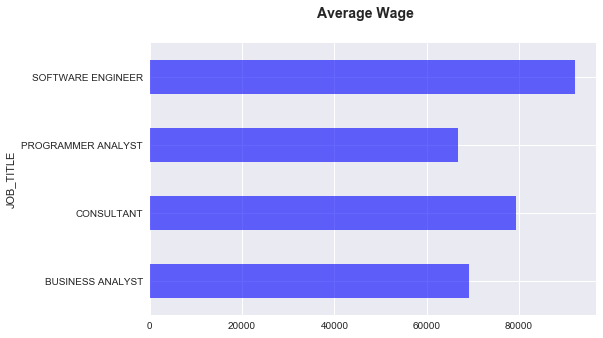

In [15]:
job_group = subset1[['JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM']].groupby('JOB_TITLE')
av_wage = job_group['WAGE_RATE_OF_PAY_FROM'].agg([np.mean])

fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Average Wage', fontsize=14, fontweight='bold')
av_wage['mean'].plot(kind = 'barh',
                     ax=ax,
                     color = 'blue',
                     alpha = 0.6
                     )

There is a huge spread in wages even when the position is the same. For example, one business analyst gets paid 720k when another only gets paid 30k. On average, software engineer is the highest paying job in the subgroup while programmer analyst turns out to be the lowest paying.

### What companies are paying significantly more than the prevailing wage?

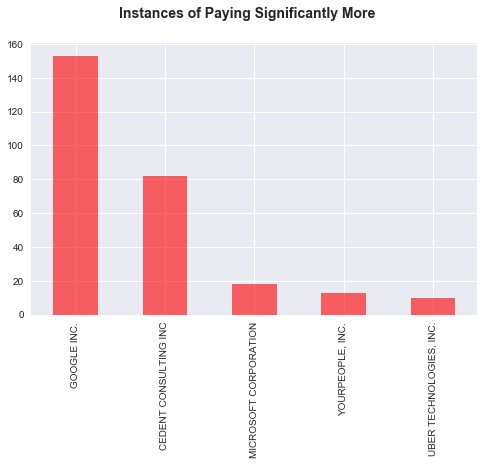

In [16]:
subset1_c = subset1.copy()
subset1_c['DIFFERENCE'] = subset1_c['WAGE_RATE_OF_PAY_FROM'] - subset1_c['PREVAILING_WAGE']
more = subset1_c.loc[subset1_c['DIFFERENCE'] > 50000]
top5companies = more['EMPLOYER_NAME'].value_counts().head()

fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Instances of Paying Significantly More', fontsize=14, fontweight='bold')
top5companies.plot(kind = 'bar',
                   ax = ax,
                   color = 'red',
                   alpha = 0.6
                   )

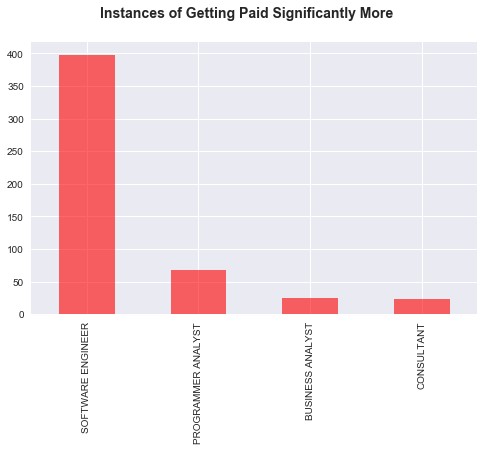

In [17]:
topjobs = more['JOB_TITLE'].value_counts()

fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Instances of Getting Paid Significantly More', fontsize=14, fontweight='bold')
topjobs.plot(kind = 'bar',
                   ax = ax,
                   color = 'red',
                   alpha = 0.6
                   )

A company is considered paying significantly more than the prevailing wage if the difference between its proposed wage and the prevailing wage exceeds $5,0000.

Companies with most instances of paying significantly more are: Google, Cedent Consulting, Microsoft, YourPeople (Zenefits) and Uber. Three of them are technology firms while two are consulting firms.

Software engineers are more likely to earn wages that well exceed the prevailing wage. Business analysts and consultants are less likely to be paid 50k more than the prevailing wage.

### Adjust for Cost of Living - Case of Business Analyst & Software Engineer

In [18]:
subset2 = subset1[['JOB_TITLE', 'WAGE_RATE_OF_PAY_FROM', 'WORKSITE_STATE']]
av_wage_state = subset2.groupby(['JOB_TITLE', 'WORKSITE_STATE'])['WAGE_RATE_OF_PAY_FROM'].mean()
av_wage_state.to_frame()

WAGE_RATE_OF_PAY_FROM
JOB_TITLE         WORKSITE_STATE                       
BUSINESS ANALYST  AL                       63000.588235
                  AR                       63140.117647
                  AZ                       69371.145000
                  CA                       75501.715274
                  CO                       71000.657895
                  CT                       72642.152284
                  DC                       73013.177419
                  DE                       69140.090909
                  FL                       64833.830139
                  GA                       65997.762058
                  HI                       61243.750000
                  IA                       62153.575000
                  ID                       67686.400000
                  IL                       67579.385444
                  IN                       68060.396040
                  KS                       67489.347826
                  KY                       64441.270270
                  LA                       67494.461538
                  MA                       70476.542489
                  MD                       72549.186011
                  ME                       56830.250000
                  MI                       67683.107801
                  MN                       67581.992000
                  MO                       66574.220779
                  MS                       42500.000000
                  MT                       62000.000000
                  NC                       70394.683920
                  ND                       54000.000000
                  NE                       61952.000000
                  NH                       67655.368421
...                                                 ...
SOFTWARE ENGINEER MD                       82716.596364
                  ME                       77426.227273
                  MI                       72693.486447
                  MN                       75290.641772
                  MO                       73862.318209
                  MS                       72267.750000
                  MT                       83917.666667
                  NC                       76268.662370
                  ND                       86613.818182
                  NE                       77758.371429
                  NH                       74951.874653
                  NJ                       74661.090252
                  NM                       62357.294118
                  NV                       83335.238095
                  NY                       97282.189517
                  OH                       70000.811643
                  OK                       66761.849091
                  OR                       86301.296439
                  PA                       76677.880493
                  RI                       74117.333333
                  SC                       63327.445570
                  SD                       48214.000000
                  TN                       72719.399059
                  TX                       73346.823432
                  UT                       82280.553239
                  VA                       79418.106819
                  VT                       72198.666667
                  WA                      116947.712985
                  WI                       73652.485019
                  WV                       71711.615385

[200 rows x 1 columns]

### Case1: Business Analyst

In [19]:
ba = av_wage_state['BUSINESS ANALYST'].to_frame()
ba = ba.reset_index()
ba

,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM
0,AL,63000.588235
1,AR,63140.117647
2,AZ,69371.145000
3,CA,75501.715274
4,CO,71000.657895
5,CT,72642.152284
6,DC,73013.177419
7,DE,69140.090909
8,FL,64833.830139
9,GA,65997.762058


### Merging Average Wage by State & Regional Price Parities

Values in the 'WORKSITE_STATE' column above are abbreviations while values in the 'State' column of the regional price parities dataframe are full names. We find a state abbreviations table online to solve for the discrepancy.

In [20]:
url2 = 'http://www.softschools.com/social_studies/state_abbreviations/'
cl = requests.get(url2)
cl.status_code

200

In [21]:
cl_soup = BeautifulSoup(cl.content, 'html.parser')

Since District of Columbia is not in the table, we append a row to the dataframe.

In [22]:
sa = pd.read_html(str(cl_soup.find_all('table')[0]), header=0)[2]
sa.loc[len(sa.index)] = ['DISTRICT OF COLUMBIA', 'DC']
sa = sa.sort_values('State')
sa = sa.reset_index(drop = True)
sa

,State,Abbreviation
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA
5,COLORADO,CO
6,CONNECTICUT,CT
7,DELAWARE,DE
8,DISTRICT OF COLUMBIA,DC
9,FLORIDA,FL


Another discrepancy that we need to deal with is to convert values in the 'State' column of the regional price parities dataframe so that they are all in uppercase letters.

In [23]:
rpps_c = rpps.copy()
rpps_c['State'] = list(map(str.upper, rpps_c['State']))

In [24]:
sarpps = pd.merge(sa, rpps_c, how = 'left', on = 'State')
sarpps = sarpps.rename(columns = {'Abbreviation': 'WORKSITE_STATE'})
sarpps

,State,WORKSITE_STATE,RPP
0,ALABAMA,AL,87.8
1,ALASKA,AK,105.7
2,ARIZONA,AZ,96.4
3,ARKANSAS,AR,87.5
4,CALIFORNIA,CA,112.4
5,COLORADO,CO,102.0
6,CONNECTICUT,CT,108.8
7,DELAWARE,DE,101.9
8,DISTRICT OF COLUMBIA,DC,118.1
9,FLORIDA,FL,99.1


#### Time to Merge & Adjust for Cost of Living!

In [25]:
blend = pd.merge(ba, sarpps, how = 'right', on = 'WORKSITE_STATE')
blend['Adjusted Wage'] = blend['WAGE_RATE_OF_PAY_FROM'] / blend['RPP'] * 100
blend

,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM,State,RPP,Adjusted Wage
0,AL,63000.588235,ALABAMA,87.8,71754.656304
1,AR,63140.117647,ARKANSAS,87.5,72160.134454
2,AZ,69371.145000,ARIZONA,96.4,71961.768672
3,CA,75501.715274,CALIFORNIA,112.4,67172.344549
4,CO,71000.657895,COLORADO,102.0,69608.488132
5,CT,72642.152284,CONNECTICUT,108.8,66766.684085
6,DC,73013.177419,DISTRICT OF COLUMBIA,118.1,61823.181557
7,DE,69140.090909,DELAWARE,101.9,67850.923365
8,FL,64833.830139,FLORIDA,99.1,65422.633843
9,GA,65997.762058,GEORGIA,92.0,71736.697889


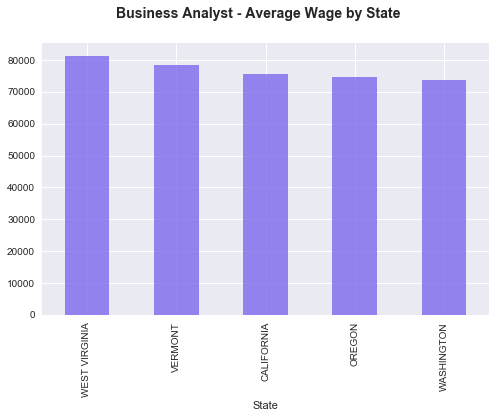

In [26]:
top5 = blend[['State', 'WAGE_RATE_OF_PAY_FROM']].sort_values('WAGE_RATE_OF_PAY_FROM', ascending = False).head()
top5 = top5.set_index('State')

fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Business Analyst - Average Wage by State', fontsize=14, fontweight='bold')
top5.plot(kind = 'bar',
          ax = ax,
          color = 'mediumslateblue',
          alpha = 0.8,
          legend = False
          )

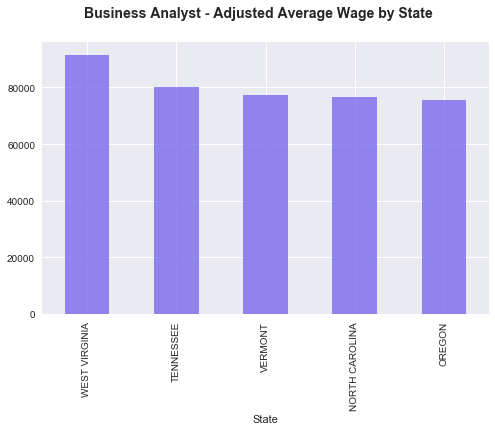

In [27]:
top5adjust = blend[['State', 'Adjusted Wage']].sort_values('Adjusted Wage', ascending = False).head()
top5adjust = top5adjust.set_index('State')

fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Business Analyst - Adjusted Average Wage by State', fontsize=14, fontweight='bold')
top5adjust.plot(kind = 'bar',
                ax = ax,
                color = 'mediumslateblue',
                alpha = 0.8,
                legend = False
                )

Based on the average wage by state without adjusting for cost of living, we may be attempted to conclude that working as a business analyst in California and Washington are not bad at all. However, California and Washington are no longer in the graph after we adjust for cost of living.

Working as a business analyst in West Virginia, Vermont and Oregon may be the best choices as these three states appear in both graphs.

### Case2: Software Engineer

In [28]:
se = av_wage_state['SOFTWARE ENGINEER'].to_frame()
se = se.reset_index()
se

,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM
0,AK,60523.000000
1,AL,66104.195122
2,AR,67304.275000
3,AZ,76044.121236
4,CA,115019.637384
5,CO,82862.799290
6,CT,77009.211495
7,DC,85755.604932
8,DE,76323.843077
9,FL,66765.357301


In [29]:
blend2 = pd.merge(se, sarpps, how = 'right', on = 'WORKSITE_STATE')
blend2['Adjusted Wage'] = blend2['WAGE_RATE_OF_PAY_FROM'] / blend2['RPP'] * 100
blend2

,WORKSITE_STATE,WAGE_RATE_OF_PAY_FROM,State,RPP,Adjusted Wage
0,AK,60523.000000,ALASKA,105.7,57259.224219
1,AL,66104.195122,ALABAMA,87.8,75289.516084
2,AR,67304.275000,ARKANSAS,87.5,76919.171429
3,AZ,76044.121236,ARIZONA,96.4,78883.943191
4,CA,115019.637384,CALIFORNIA,112.4,102330.638242
5,CO,82862.799290,COLORADO,102.0,81238.038519
6,CT,77009.211495,CONNECTICUT,108.8,70780.525271
7,DC,85755.604932,DISTRICT OF COLUMBIA,118.1,72612.705276
8,DE,76323.843077,DELAWARE,101.9,74900.729222
9,FL,66765.357301,FLORIDA,99.1,67371.702625


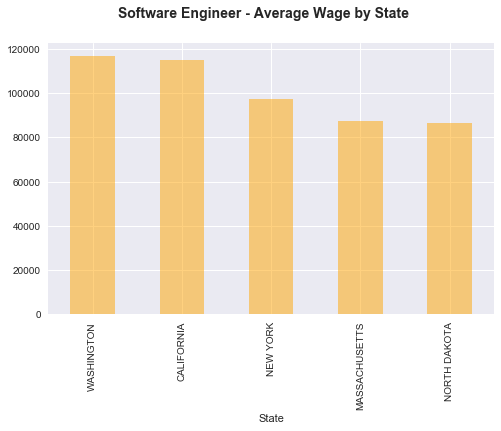

In [30]:
top5_ = blend2[['State', 'WAGE_RATE_OF_PAY_FROM']].sort_values('WAGE_RATE_OF_PAY_FROM', ascending = False).head()
top5_ = top5_.set_index('State')

fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Software Engineer - Average Wage by State', fontsize=14, fontweight='bold')
top5_.plot(kind = 'bar',
          ax = ax,
          color = 'orange',
          alpha = 0.5,
          legend = False
          )

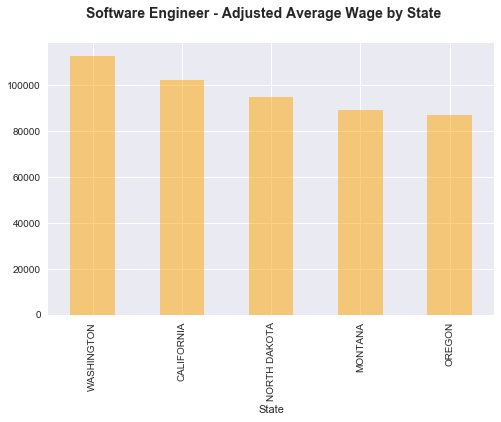

In [31]:
top5adjust_ = blend2[['State', 'Adjusted Wage']].sort_values('Adjusted Wage', ascending = False).head()
top5adjust_ = top5adjust_.set_index('State')

fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Software Engineer - Adjusted Average Wage by State', fontsize=14, fontweight='bold')
top5adjust_.plot(kind = 'bar',
                ax = ax,
                color = 'orange',
                alpha = 0.5,
                legend = False
                )

Although cost of living is higher in Washington and California, average wages of software engineers in these two states are high even after adjusted for cost of living. 

Foreign professionals who want to work as a software engineer may want to look for positions based in Washington, California and North Dakota.

### Conclusion

Our analysis suggests that California and New York have most companies that provide visa sponsorship. Two-thirds of the positions associated with most H-1B visas require basic or advanced knowledge of computer science. 

We construct a job title subgroup that includes Programmer Analyst, Business Analyst, Software Engineer and Consultant. On average, software engineer is the highest paying job. Technology firms and consulting firms are more likely to pay significantly more than the prevailing wage while software engineers are more likely to be paid significantly more than the prevailing wage.

Cost of living is something that everyone wants to take in consideration when deciding which state to work in. For example, business analysts may want to work in West Virginia while software engineers want to work in Washington or California.

One limitation of our analysis is that we only look at data for the fiscal year of 2016. Therefore, we didn't get a chance to observe any time trends. Also, job titles can be further cleaned up and better organized. For example, data analyst and healthcare data analyst should be filtered into the same category before applying the groupby method.

The Trump administration has been actively making changes to the H-1B program. For example, U.S. Citizenship and Immigration Services has released new guidance saying that computer programmers are no longer presumed to be eligible for H-1B visas. This may largely affect outsourcing companies that typically hire lower-paid and lower-skilled workers. Since new guidelines and restrictions are expected to shake up the current landscape of the H-1B program, it would be interesting to come back to this topic in the future when the annual disclosure data for the next couple years are published.